<a href="https://colab.research.google.com/github/PranaliDesai/Deep_Learning/blob/master/MNIST_image_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np  
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist    #to import the datasets
from keras.models import Sequential # to define neural model 
from keras.layers import Dense      # allows to connect us layers
from keras.optimizers import Adam   # using optimizer 
from keras.utils.np_utils import to_categorical # to allow one-hot encoding since multiclass datasets
import random               

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # to load train and test datsets with labels 

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

(60000, 28, 28)
(10000, 28, 28)
60000


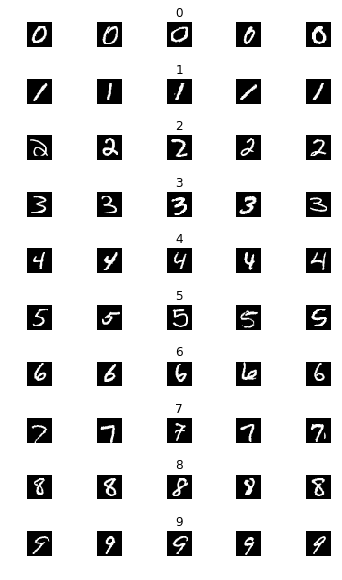

In [21]:
num_of_samples = [] # record number of images in all the ten categories 
 
cols = 5 
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()  # minimizes overlapping between plots 
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j] 
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

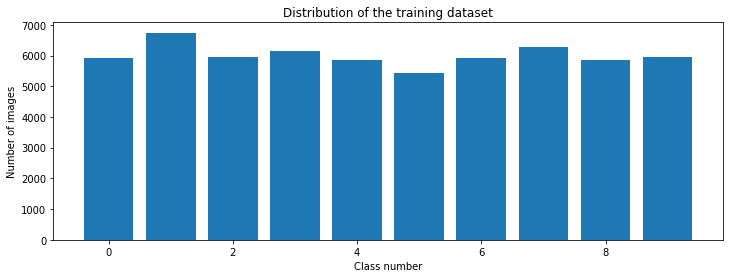

In [22]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
y_train = to_categorical(y_train, 10) #one hot encoding ( here 10 being the number of classes )
y_test = to_categorical(y_test, 10) # one hot encoding ( here 10 being the number of classes )
 
X_train = X_train/255   #normalizing to scale down the features to reduce variance 
X_test = X_test/255     #normalizing to scale down the features to reduce variance 

num_pixels = 784 #since 28*28 is the size of images 
X_train = X_train.reshape(X_train.shape[0], num_pixels) # flatten the images since weights need to be multiplied
X_test = X_test.reshape(X_test.shape[0], num_pixels)    # flatten the images since weights need to be multiplied

In [0]:
def create_model():
    model = Sequential() # defining our model 
    model.add(Dense(10, input_dim=num_pixels, activation='relu')) # adding layers with 10 nodes , input layer has "num_pixels" nodes 
    model.add(Dense(30, activation='relu')) 
    model.add(Dense(10, activation='relu')) 
    model.add(Dense(num_classes, activation='softmax')) # number of outputs = num of classes 
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.6332 - acc: 0.8055 - val_loss: 0.3218 - val_acc: 0.9032
Epoch 2/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.3815 - acc: 0.8905 - val_loss: 0.2858 - val_acc: 0.9170
Epoch 3/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3384 - acc: 0.9007 - val_loss: 0.2820 - val_acc: 0.9133
Epoch 4/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.3271 - acc: 0.9038 - val_loss: 0.2759 - val_acc: 0.9178
Epoch 5/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3146 - acc: 0.9073 - val_loss: 0.2766 - val_acc: 0.9167
Epoch 6/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3007 - acc: 0.9103 - val_loss: 0.2653 - val_acc: 0.9233
Epoch 7/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.2938 - acc: 0.9118 - val_loss: 0.2530 - val_acc:

Text(0.5, 0, 'epoch')

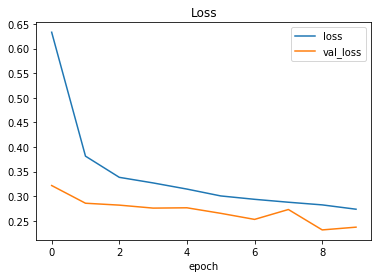

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

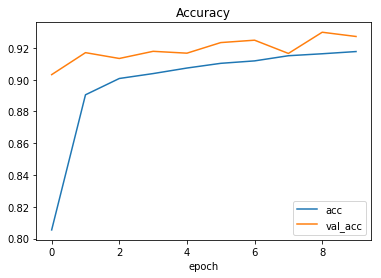

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')


In [29]:
score = model.evaluate(X_test, y_test, verbose=0) # verbose 0 here to not display progress bar 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2958778143912554
Test accuracy: 0.9148


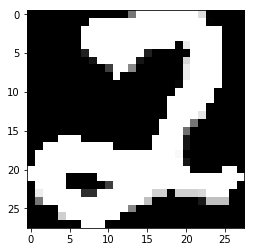

In [30]:
import requests
from PIL import Image # python imaging library 
 
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True) # to get in the memory 
img = Image.open(response.raw) 
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img) # convert to numpy to be able to modify 
img = cv2.resize(img, (28, 28)) # to convert to make it like the training images 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # since we need only two dimensional images(gray) that is 28*28
img = cv2.bitwise_not(img) # since our number should be in white and background black(like training images)
plt.imshow(img, cmap=plt.get_cmap('gray')) # to make it like the training images 

In [0]:
img = img/255 # normalizing like training images 
img = img.reshape(1, 784) # flatten just like we have training images 

In [32]:
prediction = model.predict_classes(img) # to predict the new images 
print("predicted digit:", str(prediction)) #output 

predicted digit: [2]
